<a href="https://colab.research.google.com/github/Likhitha2502/Ocaml-Project/blob/master/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP4220: Machine Learning, Spring 2022, Assignment 3


> ## **Please submit one pdf file for all questions.**


In [71]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve

In [72]:
df = pd.read_csv("wine.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## variables (based on physicochemical tests):
<ol>
 <li>fixed acidity</li>
 <li>volatile acidity</li>
 <li>citric acid</li>
 <li>residual sugar</li>
 <li>chlorides</li>
 <li>free sulfur dioxide</li>
 <li>total sulfur dioxide</li>
 <li>density</li>
 <li>pH</li>
 <li>sulphates</li>
 <li>alcohol</li>
 <li>quality (score between 0 and 10)</li>
</ol>

## Tips
> An interesting thing to do is to set an arbitrary cutoff for your dependent variable (wine quality): 7 or higher getting classified as '1' and the remainder as '0'.
>### This allows you to convert this problem into a classification problem. 

## 1. Since we want to classify the wine base on the quality so we want to look at the distribution of the wine quality
## Make a histogram plot for the quality column to see the distribution of the wine quality

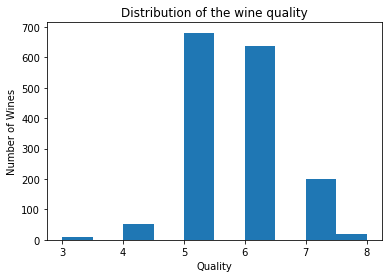

In [73]:
plt.hist(df.quality,histtype = 'bar')
plt.title("Distribution of the wine quality");
#x denotes the quality of the wine
plt.xlabel('Quality')
#y denotes the number of wines that have that quality
plt.ylabel('Number of Wines')
plt.show()

## 2. Show the number of null values using sum() method. If there are null values then remove them from the dataset

In [74]:
# returns the number of rows that have null for the respective columns
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## 3. Since we want to categorize the dependent variable (wine quality)
## Change the quality column to 1 if the quality >= 7, and 0 if the quality is < 7
## Show the dataset after making this change
## Hint: the quality column should only have 0s and 1s after the change

In [75]:
df["quality"]= [ 1 if check_quality >=7 else 0 for check_quality in df["quality"]]
df

#df['quality'] = [1 if x >= 7 else 0 for x in df ['quality']]
#df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


## 4. Create y as the quality column and X as everything but the quality column

In [76]:
y = df['quality']
#print(type(y))
#print(y.shape)
X = df.drop(['quality'],axis=1)
#print(X.shape)
#print(type(X))
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

## 5. Split the dataset into the training and test set using "train_test_split".
## Split the training and test set into 70-30 ratio

In [77]:

# random_state for having same order random numbers
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)


## 6. Apply Feature Scaling method for X_train and X_test with "StandardScaler" from "sklearn.preprocessing"
## Hint: use StandardScaler.fit_transform for "X_train" and use StandardScaler.transform for "X_test"

In [78]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
print(X_train)
X_test = std_scaler.transform(X_test)
print(X_test)


[[ 1.69536131e-01 -1.72107140e+00  4.59303345e-01 ...  1.01180685e+00
   1.22661179e+00  5.50057013e-01]
 [ 2.44606730e+00 -4.01957443e-01  1.84105501e+00 ... -2.10687612e+00
   1.22661179e+00 -2.05174641e-01]
 [-6.47680186e-01  3.77472102e-02 -1.28054303e-03 ...  4.92026353e-01
   2.97270776e-01  5.50057013e-01]
 ...
 [-6.47680186e-01  4.77451864e-01 -1.07597628e+00 ...  1.27169710e+00
  -6.90154049e-01 -8.66002338e-01]
 [-2.39072027e-01 -1.83099757e+00  4.08127357e-01 ...  3.72184202e-02
   8.20025095e-01  1.39969262e+00]
 [-1.46489650e+00 -1.33632983e+00 -5.24565306e-02 ...  4.92026353e-01
  -6.90154049e-01  2.91015593e+00]]
[[-0.35581722  0.14767337 -0.97362431 ... -0.48256207  0.00685171
  -0.77159838]
 [-0.29744462 -0.18210512 -0.51304042 ...  0.49202635 -1.03865693
  -0.86600234]
 [ 1.39536061  0.75226727 -0.25716048 ... -0.22267183  1.86553373
  -0.48838651]
 ...
 [-0.93954316 -0.40195744 -0.15480851 ...  0.49202635 -0.34165117
   0.17244119]
 [ 1.27861542 -0.12714203  1.892231

## 7. Train the logistic regression model on the training set using (solver='lbfgs', random_state = 42, max_iter = 1000)

In [79]:

log_reg = LogisticRegression(solver='lbfgs', random_state = 42, max_iter = 1000)
log_reg.fit(X_train,y_train)


LogisticRegression(max_iter=1000, random_state=42)

## 8.Predict the results of x_test

In [80]:
#using the predict method on the X_test gives y_predictions
y_predict = log_reg.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

## 9.Make the confusion matrix and show the result


In [81]:
#sgd_clf = SGDClassifier(max_iter = 1000, tol = 1e-3, loss='log',random_state = 42)
#sgd_clf.fit(X_train, y_train)

#y_pred = sgd_clf.predict(X_test)
#Y_train_Predict = cross_val_predict(sgd_clf, X_train, y_train, cv = 3)
#cm = confusion_matrix(y_train, Y_train_Predict)

#using random_state won't give you a new value everytime

cm = confusion_matrix(y_test, y_predict)
print(cm)


[[395  18]
 [ 47  20]]


## 10. find the precision_score, recall_score, and f1_score and print them

In [82]:
pre_score = precision_score(y_test, y_predict)
print(pre_score)
rec_score = recall_score(y_test, y_predict)
print(rec_score)
f_score = f1_score(y_test, y_predict)
print(f_score)

0.5263157894736842
0.29850746268656714
0.3809523809523809


## 11. Use the precision_recall_curve() function to compute precision and recall for all possible thresholds
 

In [83]:
#y_score = sgd_clf.predict_proba(X_test_scaled)[:, 1]
y_score = log_reg.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

## 12. Use Matplotlib to plot precision and recall as functions of the threshold value

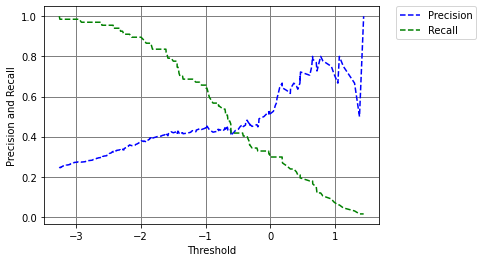

In [84]:
def plot_precision_recall_vs_thresholds(precision, recall, thresholds):
    plt.plot(thresholds, precision[:-1], "b--", label="Precision")
    plt.plot(thresholds, recall[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.ylabel("Precision and Recall")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)

plot_precision_recall_vs_thresholds(precision, recall, thresholds)
plt.show()

## 13. Plot the precision vs recall plot


<function matplotlib.pyplot.show>

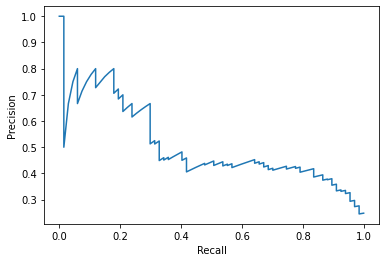

In [85]:
fig, ax = plt.subplots()
ax.plot(recall, precision)
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.show

## 14. Plot the ROC Curve

<function matplotlib.pyplot.show>

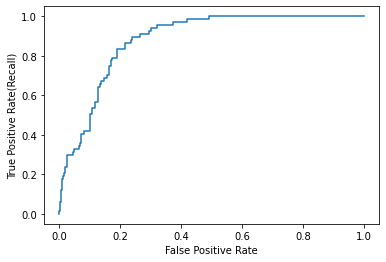

In [86]:
from sklearn.metrics import roc_curve
pr, tpr, thresh = roc_curve(y_test, y_score)
fig, ax = plt.subplots()
ax.plot(pr, tpr)
ax.set_ylabel('True Positive Rate(Recall)')
ax.set_xlabel('False Positive Rate')
plt.show

## 15. Find the area under the ROC Curve

In [87]:
from sklearn.metrics import roc_auc_score
print (roc_auc_score(y_test, y_score))

0.8816450435473963
